In [1]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# manual operation
dfs = pd.read_excel("alberta-post-secondary-graduate-earnings-by-field-of-study.xlsx", sheet_name=None)

In [3]:
### print if you want to see the values inside the dictionary
dfs.keys()

dict_keys(['Information', 'Dictionary', 'One Year After Graduation', 'Two Years After Graduation', 'Five Years After Graduation', 'Ten Years After Graduation'])

In [4]:
"""
Data exploration ideas
take 1, 2, 5 years after graduation and predicting for 10 years?

"""

'\nData exploration ideas\ntake 1, 2, 5 years after graduation and predicting for 10 years?\n\n'

In [5]:
def dataframe_cleaning(dfs, year):
    # years is a textual input from user
    if year == "One":
        df = dfs['One Year After Graduation'].dropna()
    else:
        df = dfs[f"{year} Years After Graduation"].dropna()
        
    #df = df["Years After Graduation"].dropna()
    df = df.rename(columns={"Field of Study (CIP code)": "Field_of_Study","Years After Graduation":"Years_After_Graduation"})
    df["Field_of_Study_new"] = df.Field_of_Study.str.replace('(\d+.)', '')
    df["Field_of_Study_index"] = df.Field_of_Study.str.extract('(\d+)', expand=True)
    df = df.drop(columns="Field_of_Study")
    
    for item in df.itertuples():
        if item[1] == "Overall (All Graduates)":
            df.drop(item[0], inplace=True )
        
    for item in df.itertuples():
        if item[6] == " Total (All Graduates)":
            df.drop(item[0], inplace=True )

    for item in df.itertuples():
        if item[6] == " Total":
            df.drop(item[0], inplace=True )
            
        
    print(df.Field_of_Study_new.nunique())
    return df


df = dataframe_cleaning(dfs, "Ten")

33


In [6]:
### run if we want to sort our index based on median incomes
#df = df.sort_values(['Median Income']).reset_index()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

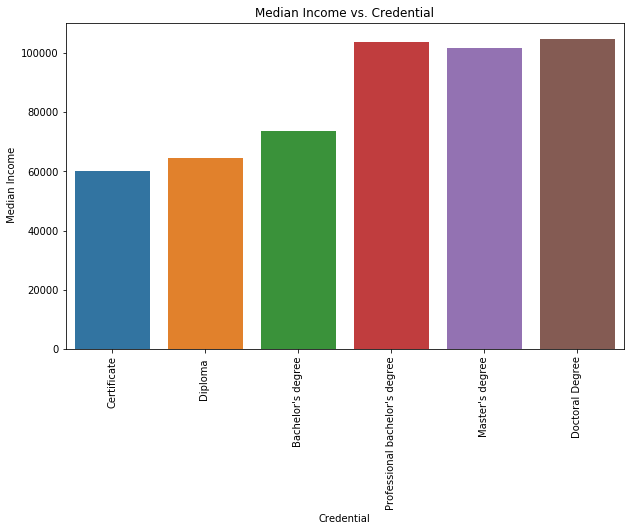

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Median Income vs. Credential")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.Credential, y=df["Median Income"], ci=None)

# Add label for vertical axis
plt.ylabel(" Median Income")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

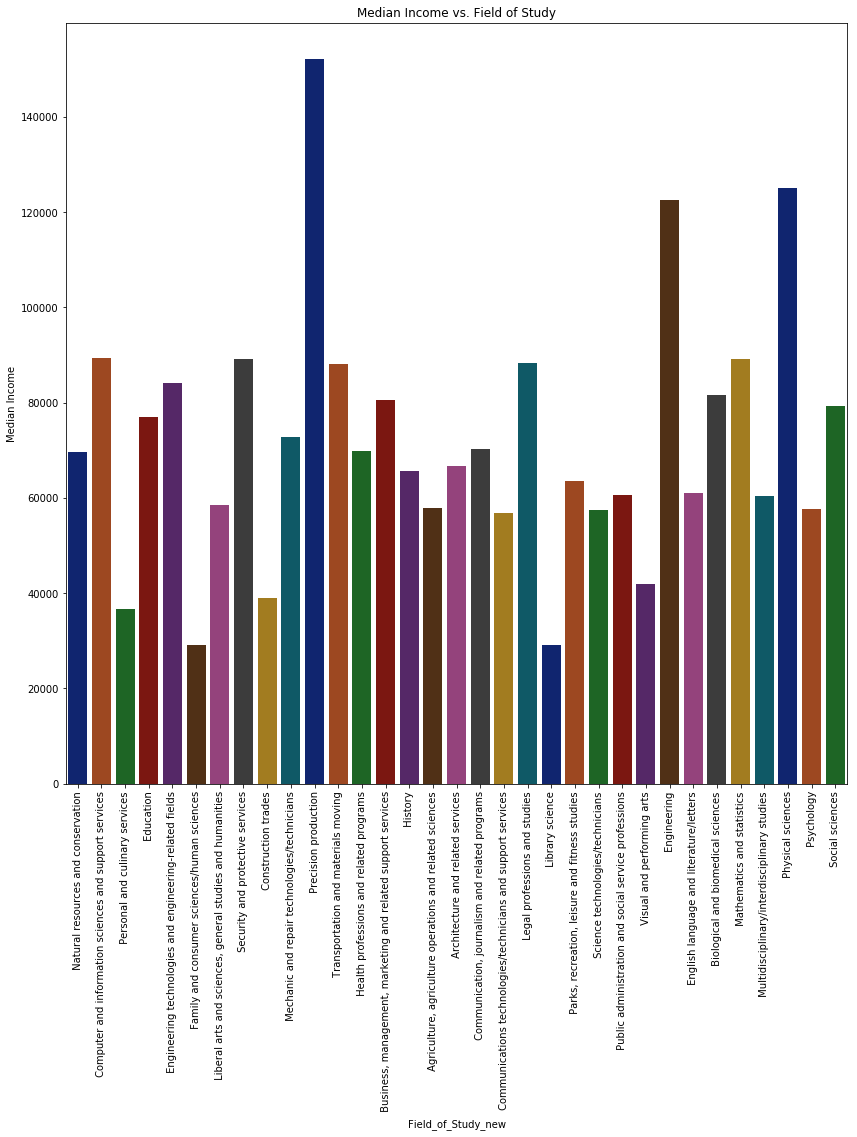

In [8]:
# Set the width and height of the figure
plt.figure(figsize=(14,14))

# Add title
plt.title("Median Income vs. Field of Study")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.Field_of_Study_new, y=df["Median Income"], ci=None, palette="dark")

# Add label for vertical axis
plt.ylabel("Median Income")
plt.xticks(rotation=90)

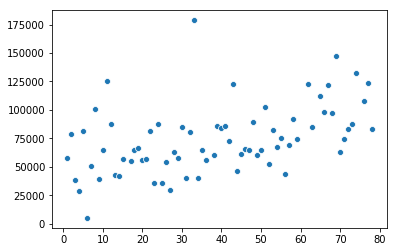

In [9]:
sns.scatterplot(data=df["Median Income"])